In [1]:
import pandas as pd
train_df = pd.read_csv('Loan.csv')
train_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Loan.csv'

In [4]:
import os
print(os.getcwd())  # Prints the current working directory
print(os.listdir())

/mnt/c/Users/soumy/Documents/Machine Learning/Machine_Learning_PClubRoadmap
['.git', '.idea', 'Intro_To_OOPS.ipynb', 'README.md', 'Week2', 'Week3']


In [1]:
import os
print(os.getcwd())  # Prints the current working directory
print(os.listdir())

/mnt/c/Users/soumy/Documents/Machine Learning/Machine_Learning_PClubRoadmap/Week3
['data', 'EDA_Article1_FollowUp.ipynb', 'EDA_Article2_FollowUp.ipynb', 'Loan.csv', 'MissingValue_ArticleFollowUp.ipynb', 'SEABORN_Tut_YT.ipynb']


In [3]:
import pandas as pd
train_df = pd.read_csv('data/Loan.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(train_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
train_df.isnull().sum().sum()

np.int64(149)

In [6]:
train_df.shape

(614, 13)

There are two methods : 
1. Deleting 2. Imputing 

## Imputing

### Replacing with an arbitrary value 
If you can make an educated guess about the missing value, then you cna replace it with some arbitrary value using the following code. E.g., in the following code, we can replac the missing values of the 'Dependents' column with '0'. 

In [7]:
train_df['Dependents'] = train_df['Dependents'].fillna(0)
train_df['Dependents'].isnull().sum()

np.int64(0)

### Replacing with the mean : 
This is the most commonn method of imputing missing values of numeric columns. If there are outliers, then the mean will not be appropriate. In such cases, outliers need to be treated first.

<Axes: ylabel='LoanAmount'>

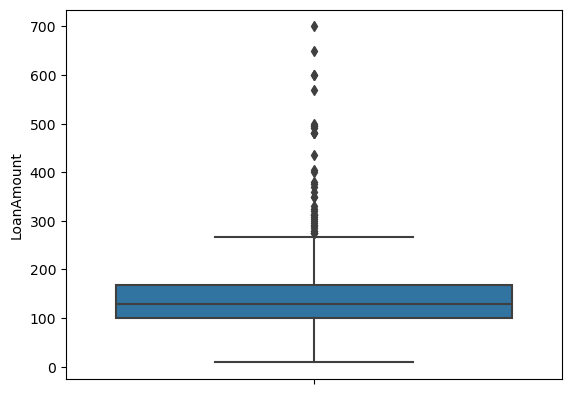

In [12]:
import seaborn as sns
sns.boxplot( y = 'LoanAmount', data=train_df)


In [13]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mean())

### Replacing with the mode : 
It is used in the case of categorical features. 

In [17]:
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Replacing with the median
It is better to use the median value for imputation in the case of outliers. 

In [18]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())

In [19]:
import pandas as pd
import numpy as np 
test = pd.Series(range(6))
test.loc[2:4] = np.nan
test

0    0.0
1    1.0
2    NaN
3    NaN
4    NaN
5    5.0
dtype: float64

In [20]:
test.fillna(method = 'ffill')

/tmp/ipykernel_17161/851048705.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method = 'ffill')


0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    5.0
dtype: float64

In [21]:
test.loc[2:4] = np.nan
test.fillna(method = 'bfill')

/tmp/ipykernel_17161/4218593062.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test.fillna(method = 'bfill')


0    0.0
1    1.0
2    5.0
3    5.0
4    5.0
5    5.0
dtype: float64

### Interpolation 
Missing values can also be imputed using interpolation. Pandas interpolate method can be used to replace the missing values with different interpolation nethods like 'polynomial', 'linear' and 'quadratic'. The default method is 'linear'. 

In [22]:
test.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

## How to Impute Missing Values for Categorical Features?
There are two ways to impute missing values for categorical features as follows : 

### Impute the Most Frequent Value 
We will use 'SimpleImputer' in this case, and as this is a non-numeric column, we can't use mean or median, but we can use th emost frequent value and constant. 

In [23]:
import pandas as pd
import numpy as np 
X = pd.DataFrame({'Shape': ['square', 'square', 'oval', 'circle',   np.nan]})
X

,Shape
0,square
1,square
2,oval
3,circle
4,NaN


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['square']], dtype=object)

### Impute the Value 'Missing'
We can impute the value 'missing' which treats it as a seperate category. 

In [28]:
X = pd.DataFrame({'Shape': ['square', 'square', 'oval', 'circle',   np.nan]})
imputer = SimpleImputer(strategy = 'constant',fill_value = 'missing')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['missing']], dtype=object)

We can impute missing values using the sci-kit library by creating a model to predict the observed value of a variable based on another variable which is known as regression imputation

### Univariate Approach 
In a Univariate approach, only a single feature is taken into consideration. You can use the class SimpleImputer and replace the missing values with mean, mode, median or some constant value.  

In [30]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit([[1,2], [np.nan, 3], [7, 6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


### Multivariate Approach 
In a multivariate approach, more than one feature is taken into consideration. There are two ways to impute missing values considering the multivariate approach. Using KNNImputer or IterativeImputer classes

In [31]:
import pandas as pd 
df = pd.read_csv('http://bit.ly/kaggletrain', nrows = 6)
cols = ['SibSp','Fare', 'Age']
X = df[cols]
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

In [33]:
from sklearn.impute import KNNImputer

df = pd.read_csv('http://bit.ly/kaggletrain', nrows = 6)
cols = ['SibSp','Fare', 'Age']
X = df[cols]

impute_knn = KNNImputer(n_neighbors = 2)
impute_knn.fit_transform(X)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

In [35]:
X = pd.DataFrame({'Age':[20,30,10,np.nan,10]})
X

,Age
0,20.0
1,30.0
2,10.0
3,NaN
4,10.0


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(add_indicator = True)
X['Age'] = imputer.fit_transform(X)

In [39]:
X

,Age
0,20.0
1,30.0
2,10.0
3,17.5
4,10.0
